In [1]:
# Análise dos pacotes maliciosos - Negação de serviço

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

print("Executado")

Executado


In [2]:
train = pd.read_pickle("/kaggle/input/mqttset-processed/train_processed.pkl")
test = pd.read_pickle("/kaggle/input/mqttset-processed/test_processed.pkl")

print(train.shape)
print(test.shape)
print("\n")
print(train['target'].value_counts())
print(test['target'].value_counts())

(5600000, 34)
(2400000, 34)


target
malicioso     2800000
legitimate    2800000
Name: count, dtype: int64
target
malicioso     1200000
legitimate    1200000
Name: count, dtype: int64


In [3]:
#features
print(train.keys())

Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
       'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
       'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
       'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.ver',
       'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
       'mqtt.willtopic_len', 'target'],
      dtype='object')


In [4]:
columns = [
    'tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
    'mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val',
    'mqtt.conflag.cleansess', 'mqtt.conflag.passwd', 'mqtt.conflag.qos',
    'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname',
    'mqtt.conflag.willflag', 'mqtt.conflags', 'mqtt.dupflag',
    'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
    'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
    'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.ver',
    'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic',
    'mqtt.willtopic_len', 'target'
]

for col in columns:
    print(f"Valores únicos na coluna '{col}':")
    print(train[col].unique())
    print('-' * 50)

Valores únicos na coluna 'tcp.flags':
['0x00000010' '0x00000018' '0x00000002' '0x00000012' '0x00000011']
--------------------------------------------------
Valores únicos na coluna 'tcp.time_delta':
[4.000000e-06 1.999376e+00 0.000000e+00 ... 9.996680e-01 1.501826e+00
 5.014160e-01]
--------------------------------------------------
Valores únicos na coluna 'tcp.len':
[    0 32760     8   105     4  1460 15980 32759    20    28    78   101
 12510 18648    81   104    91    16    95 19448    32   100   109   170
 29664 26800    80 13716   682    24    99    97 21060   144  3162    36
 25992   174    40    84    90  9231 23783  8177    64 32768    88    67
 31500  2412  4709   107 26280    12    92   165   845 30719 11832    77
   184   114  6372    75 14058   125 17527  6084    61  7904 26197    51
 21690   204    98    96 28985    69    85 21862  2108   119    57    83
    94   374   685   158  1183    68   843 27064 28116  1359    60    93
    59    72   179   118   865 11645    82  1

In [5]:
# verificação de colunas com valores uniformes
single_value_columns = []

for col in columns:
    if train[col].nunique() == 1:
        single_value_columns.append(col)

print("Colunas com apenas um valor único:")
print(single_value_columns)

Colunas com apenas um valor único:
['mqtt.conack.flags.reserved', 'mqtt.conack.flags.sp', 'mqtt.conack.val', 'mqtt.conflag.passwd', 'mqtt.conflag.qos', 'mqtt.conflag.reserved', 'mqtt.conflag.retain', 'mqtt.conflag.uname', 'mqtt.conflag.willflag', 'mqtt.retain', 'mqtt.sub.qos', 'mqtt.suback.qos', 'mqtt.willmsg', 'mqtt.willmsg_len', 'mqtt.willtopic', 'mqtt.willtopic_len']


In [6]:
# exclusão das colunas com valores únicos
train = train.drop(columns=single_value_columns)
print(train.shape)
print("\n")
print(train.columns)

(5600000, 18)


Index(['tcp.flags', 'tcp.time_delta', 'tcp.len', 'mqtt.conack.flags',
       'mqtt.conflag.cleansess', 'mqtt.conflags', 'mqtt.dupflag',
       'mqtt.hdrflags', 'mqtt.kalive', 'mqtt.len', 'mqtt.msg', 'mqtt.msgid',
       'mqtt.msgtype', 'mqtt.proto_len', 'mqtt.protoname', 'mqtt.qos',
       'mqtt.ver', 'target'],
      dtype='object')


In [7]:
# transformação das variáveis categóricas

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


for col in train.columns:
    if train[col].dtype == 'object':
        train[col] = label.fit_transform(train[col].astype(str))
    else:
        train[col] = label.fit_transform(train[col])

print(train.head())

    tcp.flags  tcp.time_delta  tcp.len  mqtt.conack.flags  \
2           1               5        0                  0   
4           4           12193      727                  0   
10          4               1        3                  0   
14          1               2        0                  0   
16          1              17        0                  0   

    mqtt.conflag.cleansess  mqtt.conflags  mqtt.dupflag  mqtt.hdrflags  \
2                        0              0             0              0   
4                        0              0             0              3   
10                       0              0             0              6   
14                       0              0             0              0   
16                       0              0             0              0   

    mqtt.kalive  mqtt.len  mqtt.msg  mqtt.msgid  mqtt.msgtype  mqtt.proto_len  \
2             0         0         0           0             0               0   
4             0        11 

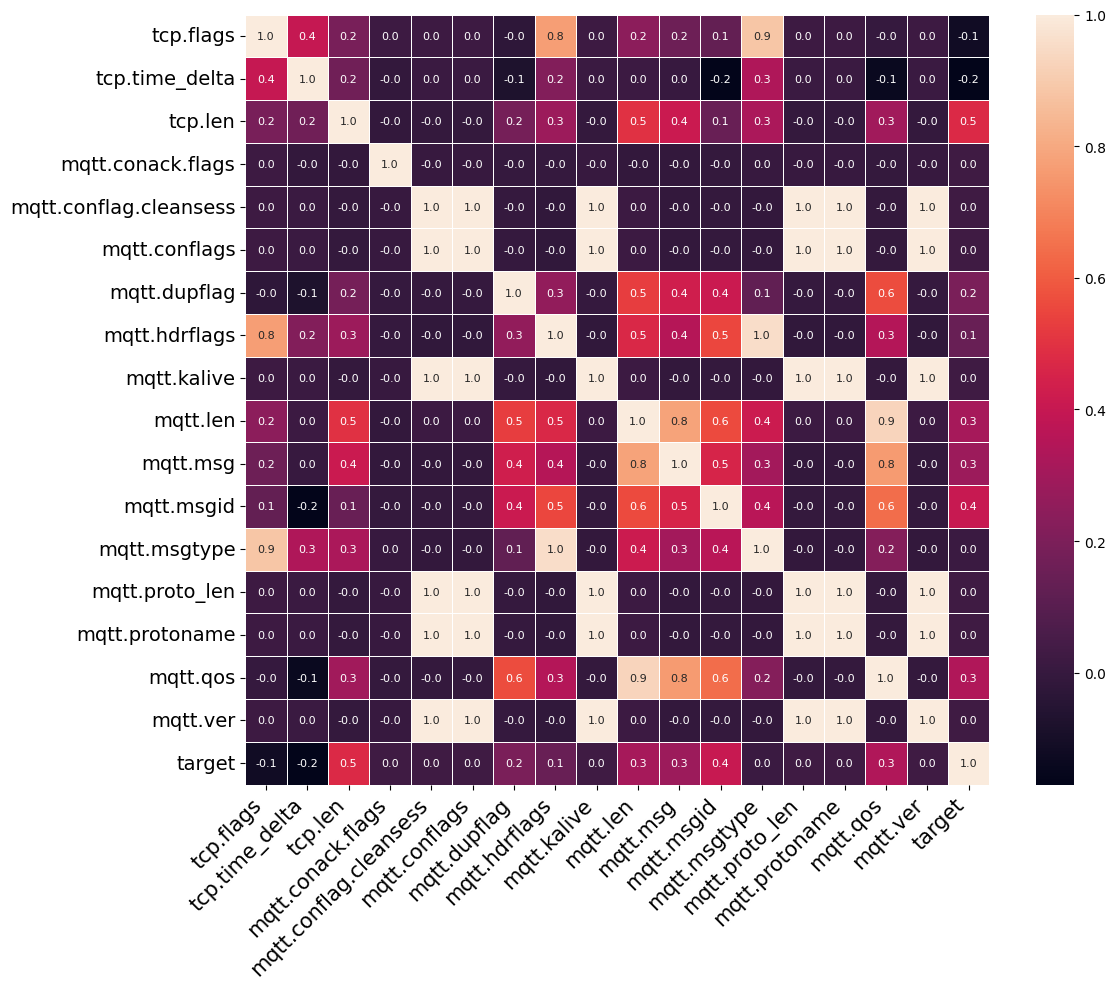

In [8]:
#correlação das features

correlation = train.corr()

plt.figure(figsize=(12, 10))
plot = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=0.6, annot_kws={"size": 8})
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)
plot.set_yticklabels(plot.get_yticklabels(), fontsize=14)
plt.show()

**Figuras do correlacionamento de features maior que 8**

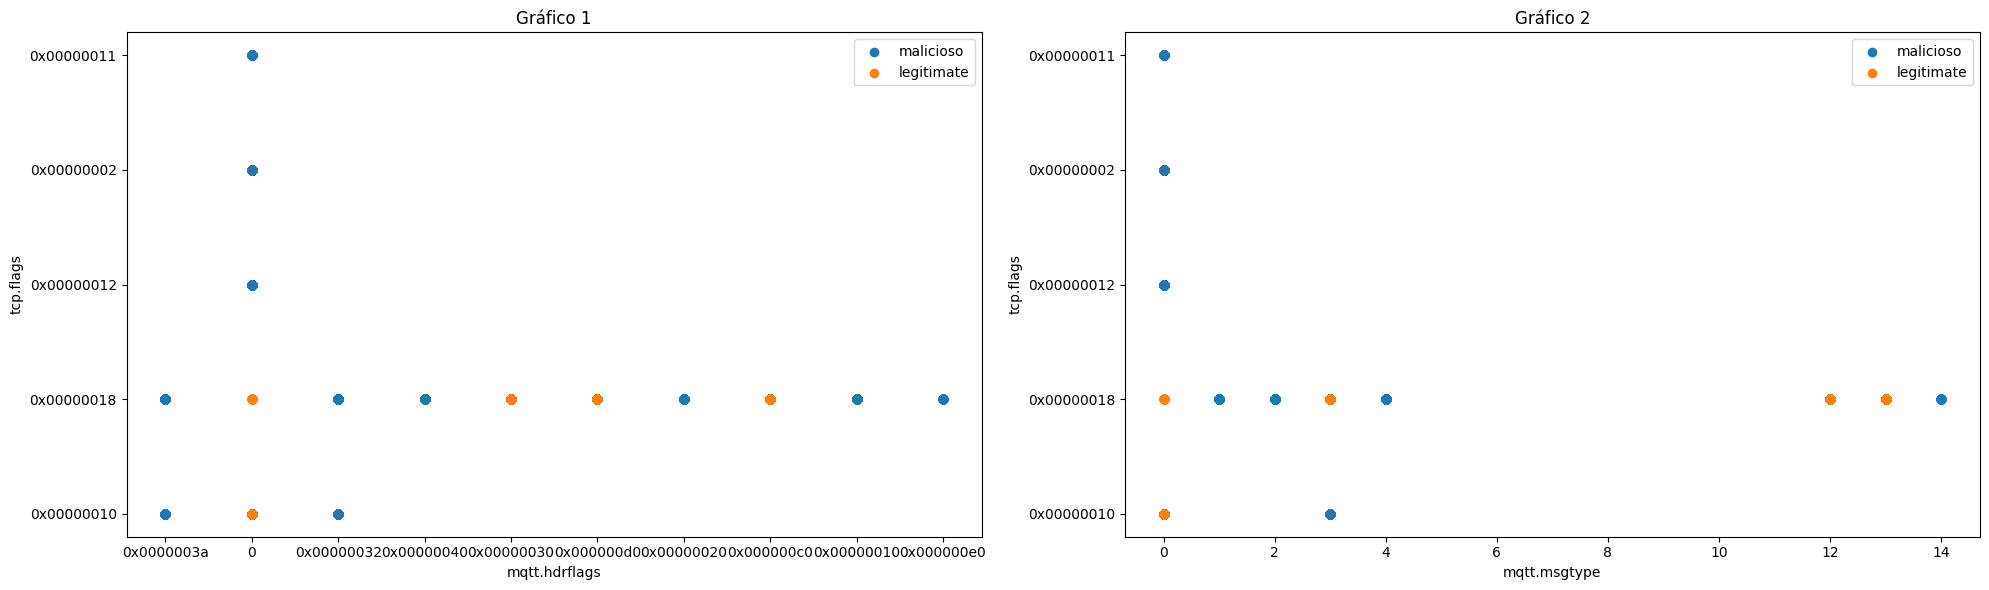

In [9]:
# usando o conjunto de teste, que não foram retiradas as variáveis categóricas

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

for i in test['target'].unique():
    dataclass = test[test['target'] == i]
    axes[0].scatter(dataclass['mqtt.hdrflags'], dataclass['tcp.flags'], label=i)
axes[0].set_xlabel('mqtt.hdrflags')
axes[0].set_ylabel('tcp.flags')
axes[0].legend()
axes[0].set_title('Gráfico 1')
for i in test['target'].unique():
    dataclass = test[test['target'] == i]
    axes[1].scatter(dataclass['mqtt.msgtype'], dataclass['tcp.flags'], label=i)
axes[1].set_xlabel('mqtt.msgtype')
axes[1].set_ylabel('tcp.flags')
axes[1].legend()
axes[1].set_title('Gráfico 2')

plt.tight_layout()
plt.show()


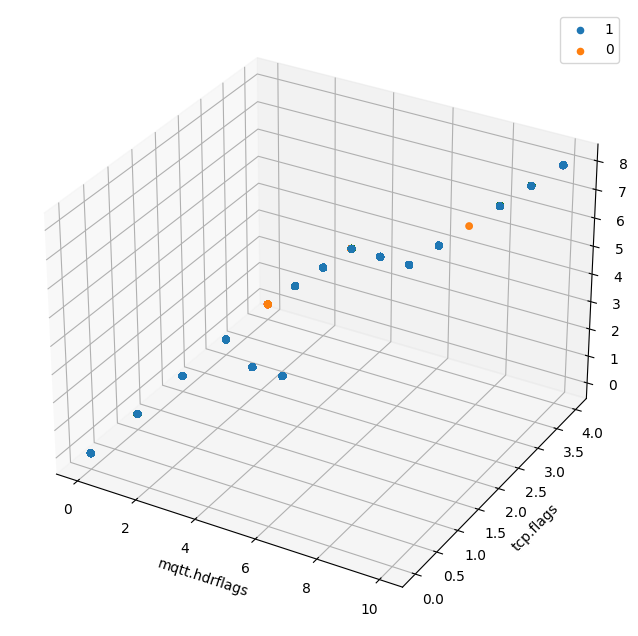

In [10]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')



for i in train['target'].unique():
    classes = train[train['target'] == i]
    ax.scatter(classes['mqtt.hdrflags'], classes['tcp.flags'], classes['mqtt.msgtype'], label=i)


ax.set_xlabel('mqtt.hdrflags')
ax.set_ylabel('tcp.flags')
ax.set_zlabel('mqtt.msgtype')
plt.title('')
plt.legend()
plt.show()

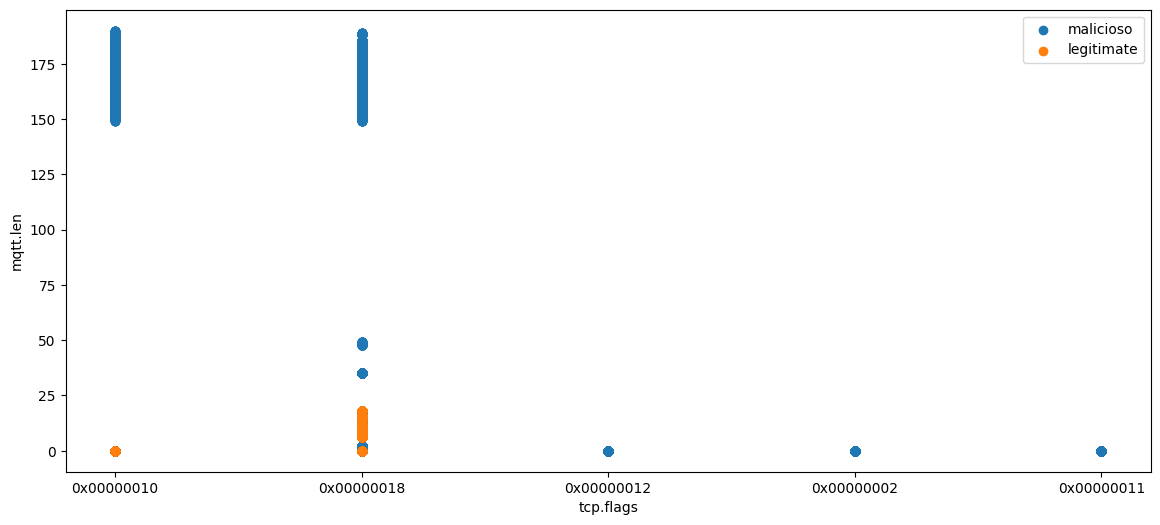

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))
for i in test['target'].unique():
    dataclass = test[test['target'] == i]
    plt.scatter(dataclass['tcp.flags'], dataclass['mqtt.len'], label=i)
plt.xlabel('tcp.flags')
plt.ylabel('mqtt.len')
plt.legend()
plt.title('')
plt.show()

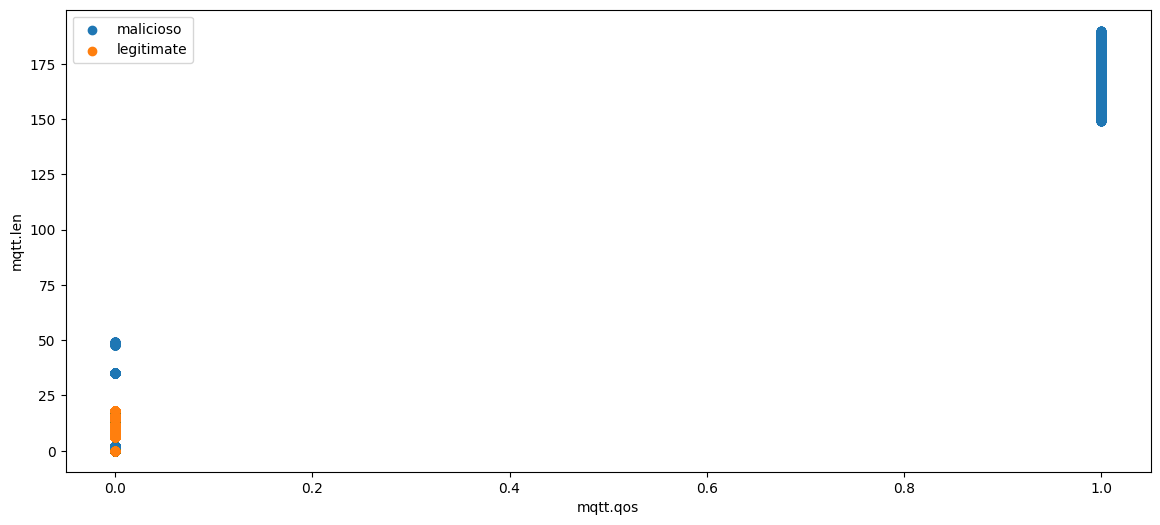

In [14]:
fig, ax = plt.subplots(figsize=(14, 6))
for i in test['target'].unique():
    dataclass = test[test['target'] == i]
    plt.scatter(dataclass['mqtt.qos'], dataclass['mqtt.len'], label=i)
plt.xlabel('mqtt.qos')
plt.ylabel('mqtt.len')
plt.legend()
plt.title('')
plt.show()